In [134]:
# Library Used, 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
%matplotlib inline

---

Hunter Carroll 
---

Programming Homework 6
---


---

---

Problem 1
---

The dataset compute_servers.mat contains data that measure the throughput (mb/s) (second column) and latency (ms) (first column) of 307 server computers being monitored. You suspect that most of these examples are "normal" examples of the servers operating normally, but there may also be some examples of servers acting anomalously within this dataset.


---

<font color = '#55BD61'>a. Make a scatter plot of the data. The first columm is latency and the second is throughput. Does it look like that there are anomalies?
---


---


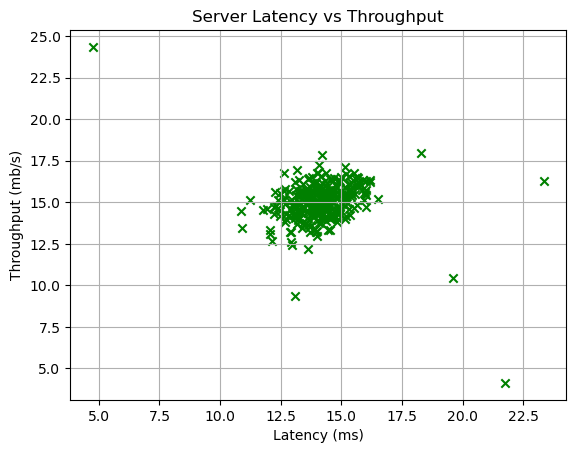

In [135]:
file_path = '/Users/huntercarroll/Desktop/DesktopHunter/University/Spring2024/Machine Learning/ProgrammingHomework/Homework6Programming/compute_servers.mat'
data = scipy.io.loadmat(file_path)
#print(data.keys())
df = data['X']
latency = df[:, 0]  
throughput = df[:, 1]

plt.grid(True)
plt.scatter(latency, throughput, c = 'g',marker='x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Server Latency vs Throughput')
plt.show()

---

<font color = '#55BD61'>b. Now we will use a Gaussian mixture model to detect anomalous examples. Just by looking at the plot in Part (a), how many Gaussian distributions should be considered in the mixture model?</font>
---

<font color = '#55BD61'>My Solution:</font> 

Based off the plot in part (a) there should be 1 Gaussian distribution considered in the mixture model. That is, there exists only one cluster centered in the middle of the plot with a lack of subclusters surrounding the central cluster. 

---

---

<font color = '#55BD61'>c.Use the number of Gaussian distributions found in Part (b) to build a Gaussian mixture model for the data. Show the weight(s), mean(s) and covariance matrix (matrices) of the Gaussian distriubtion(s).</font>
---

---

In [136]:
gm = GaussianMixture(n_components = 1,n_init=20, random_state = 10)
gm.fit(df)
print('='*100)
print('Weights=', gm.weights_)
print('Means= ', gm.means_)
print('Covariances = ',gm.covariances_)
print('='*100)

Weights= [1.]
Means=  [[14.11222578 14.99771051]]
Covariances =  [[[ 1.83263241 -0.22712233]
  [-0.22712233  1.70974633]]]



---
<font color = '#55BD61'>d. Now that you have estimated the Gaussian parameters, we can use it for anomaly detection as we did in Lecture 12. Consider a range of percentiles: 100 percentiles equidistantly distributed between 0.001 and 5, i.e., between the 0.001th percentile and 5th percentile of the densities. Use the true labels provided in the data and F1 score to find the best percentile that should be used for anomaly detection.</font>
---

---

In [137]:
print(data.keys())
True_Labels = data['yval'].ravel() 

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])


In [138]:
percentile = np.linspace(0.001, 5, 100)
densities = gm.score_samples(df)
density_threshold = np.percentile(densities, percentile)

percentiles = np.linspace(0.001, 5, 100)
f1_scores = []

for percentile in percentiles:
    threshold = np.percentile(densities, percentile)
    preds = densities < threshold
    score = f1_score(True_Labels, preds)
    f1_scores.append(score)

best_f1_score = max(f1_scores)
best_percentile = percentiles[f1_scores.index(best_f1_score)]
best_threshold = np.percentile(densities, percentiles[f1_scores.index(best_f1_score)])

print('='*100)
print(f'Best F1 Score: {best_f1_score}')
print(f'Best percentile for anomaly detection: {best_percentile}')
print(f'Best Threshold for anomaly detection:{best_threshold}')
print('='*100)

Best F1 Score: 0.8
Best percentile for anomaly detection: 1.6673333333333331
Best Threshold for anomaly detection:-10.283068038897584


---
<font color = '#55BD61'>e. Make a scatter plot of the data. This time, use a different color for the anomalous data points.</font>
---

---


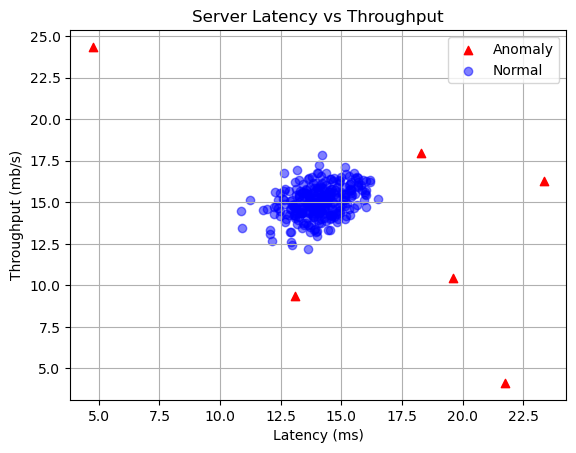

In [139]:
anomalies = df[densities < best_threshold]
normal = df[densities >= best_threshold]

plt.grid(True)
plt.scatter(anomalies[:,0], anomalies[:,1], c = 'red', marker = '^', label = 'Anomaly')
plt.scatter(normal[:,0], normal[:, 1], c = 'blue', marker = 'o', label = 'Normal', alpha = 0.5)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Server Latency vs Throughput')
plt.legend()

---

Problem 2
---

In this exercise, you will implement the K-means algorithm for image compression. Recall in a straightforward color representation of an image, each pixel is represented as three usigned integers ranging from 0 to 255 that specify the red, gree and blue intensity values. This encoding is refered to as the RGB encoding. The image included 'bird_small.png' contains thousands of colors, and you will reduce the number of colors to 16 colors.

Use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Specifically, treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group the pixels in the 3-dimensional RGB space. Once you have computed the cluster centroids on
the image, you will then use the 16 colors to replace the pixels in the original
image.


---

---

<font color = '55BD61'>a) Load the image (128 by 128 by 3) and show the image. Reshape it to a two dimensional array with 3 columns.</font>
---


---


Image Shape: (128, 128, 3)
Image Reshape: (16384, 3)


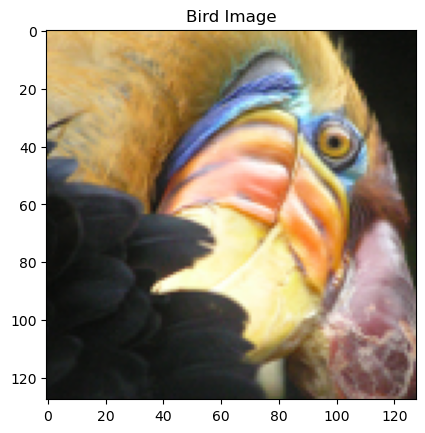

In [140]:
image = mpimg.imread('/Users/huntercarroll/Desktop/DesktopHunter/University/Spring2024/Machine Learning/ProgrammingHomework/Homework6Programming/bird_image.png')
plt.imshow(image)
plt.title('Bird Image')
image_reshape = image.reshape(-1, 3)
print('Image Shape:',image.shape)
print('Image Reshape:', image_reshape.shape) # two dimensional array with 3 columns

---

<font color = '55BD61'>b) Apply K-Means clustering to the image data with 16 clusters and show the centroids. Set the random_state to 10.</font>
---


---


In [141]:
k=16
kmeans = KMeans(n_clusters = k, random_state = 10).fit(image_reshape)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [142]:
centroids = kmeans.cluster_centers_
centroids

array([[0.820313  , 0.7375208 , 0.72621393],
       [0.15208039, 0.15654668, 0.14857803],
       [0.75144154, 0.6022024 , 0.34102648],
       [0.46342883, 0.337167  , 0.19645935],
       [0.97564524, 0.944505  , 0.8175234 ],
       [0.5622424 , 0.46868548, 0.41289786],
       [0.5737917 , 0.72686195, 0.8708947 ],
       [0.08253416, 0.0894095 , 0.07908809],
       [0.91760886, 0.580499  , 0.26281378],
       [0.863788  , 0.7162466 , 0.45895004],
       [0.6768062 , 0.60739714, 0.5492934 ],
       [0.652468  , 0.47089896, 0.20278235],
       [0.39875507, 0.47195768, 0.6675693 ],
       [0.9631345 , 0.85876906, 0.6312557 ],
       [0.3824264 , 0.3508187 , 0.36031985],
       [0.26404446, 0.2369386 , 0.22804448]], dtype=float32)

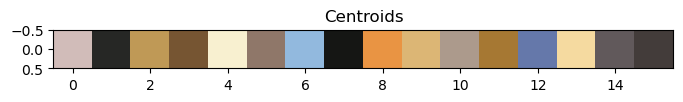

In [143]:
plt.figure(figsize=(8, 4))
plt.imshow(centroids.reshape(1, 16, 3)) # Our 16 colors for image compression "our image dictionary"
plt.axis('on')
plt.title('Centroids')
plt.show()

---

c) Now, you have significantly reduced the number of bits (bytes) that are required to describe the image. The original image required 24 bits (or 3 bytes, one for each of R,G,B)  for each one of the $128\times 128$ pixel locations, resulting in total size of $128\times128\times24 = 393216$ bits. The new representation requires some
overhead storage in form of a dictionary of 16 colors, each of which require
$24$ bits, but the image itself then only requires 4 bits (an unsigned integer from 0 to 15 indicating the cluster number) per pixel location. The total number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65920$ bits,
which corresponds to compressing the original image by about a factor of 6.

<font color = '55BD61'>c) Now view the effects of the compression by reconstructing the image based only on the centroid assignments. Specifically, you can replace the RGB intensities at each pixel location with the mean of the centroid assigned to it.</font>
---


---

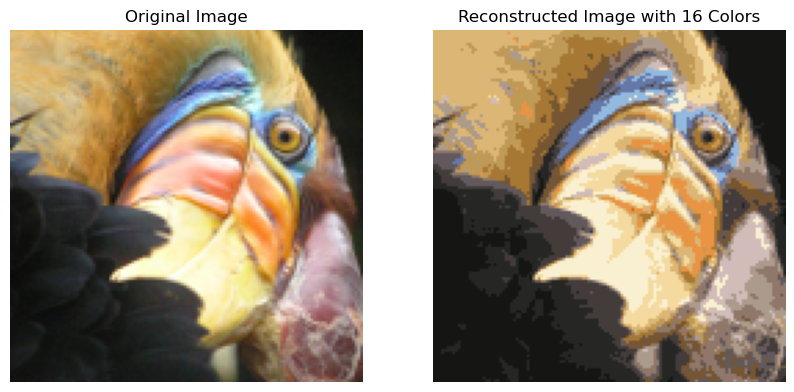

In [144]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

# Plot the original, 
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Plot the reconstructed image,
plt.subplot(1, 2, 2) 
plt.imshow(segmented_img)
plt.title('Reconstructed Image with 16 Colors')
plt.axis('off') 
plt.show()